In [1]:
import pandas as pd
voice2 = pd.read_csv('Voice2.csv')
voice_self_recorded = pd.read_csv('Voice_self_recorded.csv')

#normalise 
from sklearn import preprocessing
import numpy as np

X_columns = ['Jitter (local, absolute)', 'Jitter (rap)', 'Jitter (ppq5)', 'Shimmer (local,dB)',
       'Shimmer (apq3)', 'Shimmer (apq5)', 'Shimmer (dda)']
# based on heat correlation map ref SVR 
# shimmer(local,dB) -0.22, shimmer(local) -0.16, shimmer(apq11) -0.15
# jitter(rap) -0.13, jitter(ddp) -0.13

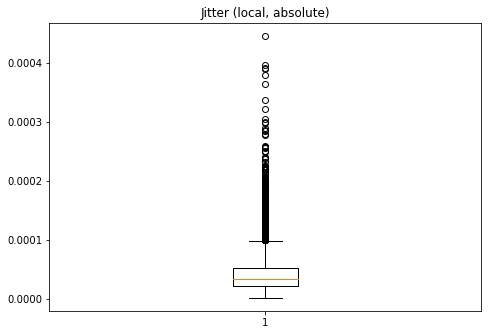

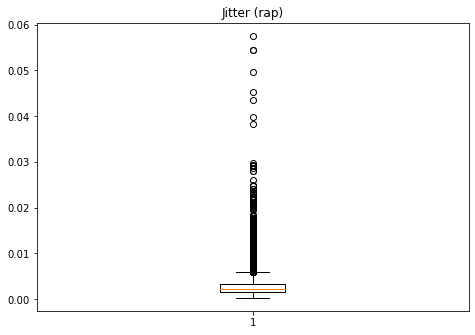

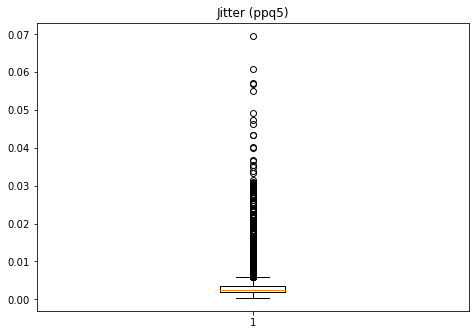

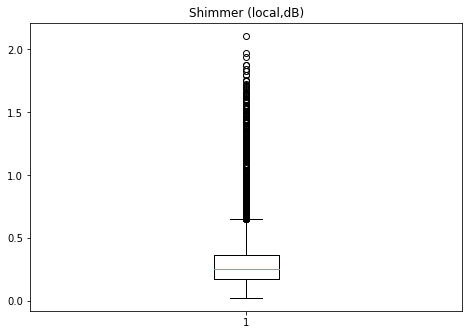

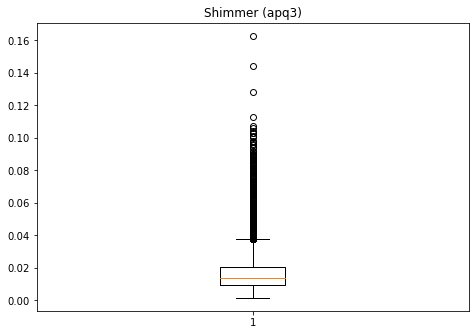

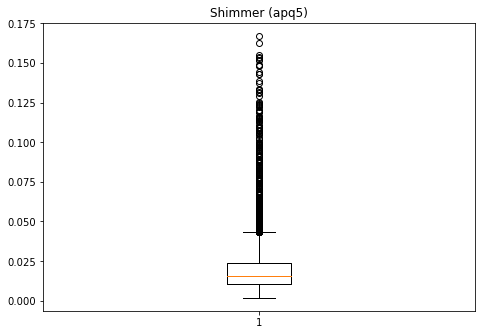

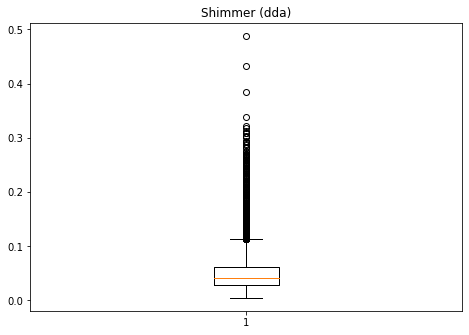

In [2]:
# Data visualization
import matplotlib.pyplot as plt

for col in X_columns:
    data = voice2[col]
    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1])
    bp = ax.boxplot(data)
    plt.title(col)
    plt.show()

In [3]:
voice_self_recorded

,Unnamed: 0,UPDRS,"Jitter (local, absolute)",jitt,Jitter (rap),Jitter (ppq5),"Shimmer (local,dB)",Shimmer (dda),Shimmer (apq3),Shimmer (apq5),Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,2,23,0.000169,94.264671,56.562281,68.654414,0.988395,11.222898,6.635682,6.969409,NaN,NaN,NaN,NaN
1,2,23,0.000066,11.042156,7.019855,7.687018,1.118250,12.736114,7.453174,7.915931,NaN,NaN,NaN,NaN
2,2,23,0.000204,36.030928,22.576837,25.717415,1.161556,13.368274,7.678657,8.296504,NaN,NaN,NaN,NaN
3,2,23,0.000138,23.934021,15.089192,19.052222,1.629833,18.991264,10.924635,12.106456,NaN,NaN,NaN,NaN
4,2,23,0.000104,17.930381,11.627678,15.437250,1.547108,18.749904,10.994344,12.540737,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,1,0,0.000110,19.703530,17.373676,30.766556,2.336807,25.881057,16.397455,5.726872,0,52.121029,49.192364,NaN
83,1,0,0.000561,132.341726,80.015918,62.745200,0.725407,7.715708,3.223767,5.415929,0,240.047754,9.671302,NaN
84,1,0,0.000338,121.243824,56.565814,51.592627,0.705653,8.163265,3.769841,6.785714,0,169.697441,11.309524,NaN
85,1,0,0.000190,117.115480,93.561696,128.386973,0.790999,9.316770,4.658385,10.248447,0,280.685089,13.975155,NaN


In [4]:
# Data preprocessing
X_standardized = np.empty(shape=[0, len(voice2)])
X2_standardized = np.empty(shape=[0, len(voice_self_recorded)])

for col in X_columns:
    data = voice2[col]
    standardized_col = (data - data.mean()) / data.std()
    X_standardized = np.append(X_standardized, [standardized_col], axis=0)

for col in X_columns:
    data = voice_self_recorded[col]
    standardized_col = (data - data.mean()) / data.std()
    X2_standardized = np.append(X2_standardized, [standardized_col], axis=0)
    
X_standardized = np.swapaxes(X_standardized, 0, 1)
X2_standardized = np.swapaxes(X2_standardized, 0, 1)

X = np.concatenate((X_standardized, X2_standardized))
Y = pd.concat([voice2.iloc[:, 0], voice_self_recorded.iloc[:, 0]], axis=0)

print(X.shape)
print(Y.shape)
print(X)
print(Y)

(5962, 7)
(5962,)
[[-0.28435508  0.32742464 -0.0286346  ... -0.20969095 -0.42332047
  -0.20968646]
 [-0.79293331 -0.55931048 -0.52172908 ... -0.98553961 -0.93100374
  -0.98528253]
 [-0.64841928 -0.40245119 -0.43597352 ... -0.8767546  -0.81818523
  -0.87674944]
 ...
 [ 0.26722435  0.36542999 -0.00848271 ... -1.24689796 -0.51405208
  -1.10815545]
 [-0.34855045  1.55033716  2.12316856 ... -0.98649744  0.53932625
  -0.8859538 ]
 [-0.85591987 -1.27883805 -1.18307489 ...  0.0087895   0.70123046
  -0.35332431]]
0     3
1     3
2     3
3     3
4     3
     ..
82    1
83    1
84    1
85    1
86    1
Length: 5962, dtype: int64


In [5]:
unique, counts = np.unique(Y, return_counts=True)
print(dict(zip(unique, counts)))

# Random Oversampling
import random

num_cats = X.shape[1]
max_count = max(counts)

df = pd.DataFrame(X)
df['label'] = Y.values

df_1 = df[df['label'] == 1]
df_2 = df[df['label'] == 2]
df_3 = df[df['label'] == 3]

random.seed(100)
sample_indexes_1 = random.choices(range(len(df_1)), k=max_count)
df_1_resampled = np.empty(shape=[0, num_cats])
for i in sample_indexes_1:
    df_1_resampled = np.append(df_1_resampled, [df_1.iloc[i, :num_cats]], axis=0)

sample_indexes_3 = random.choices(range(len(df_3)), k=max_count)
df_3_resampled = np.empty(shape=[0, num_cats])
for i in sample_indexes_3:
    df_3_resampled = np.append(df_3_resampled, [df_3.iloc[i, :num_cats]], axis=0)

X_resampled = np.empty(shape=[0, num_cats])
X_resampled = np.append(X_resampled, df_1_resampled, axis=0)
X_resampled = np.append(X_resampled, df_2.iloc[:, :num_cats], axis=0)
X_resampled = np.append(X_resampled, df_3_resampled, axis=0)

Y_labels = np.empty(shape=[0])
Y_labels = np.append(Y_labels, [0] * len(df_1_resampled), axis=0)
Y_labels = np.append(Y_labels, [1] * len(df_2), axis=0)
Y_labels = np.append(Y_labels, [2] * len(df_3_resampled), axis=0)

print(X_resampled.shape)
print(Y_labels.shape)
unique, counts = np.unique(Y_labels, return_counts=True)
print(dict(zip(unique, counts)))

{1: 301, 2: 2968, 3: 2693}
(8904, 7)
(8904,)
{0.0: 2968, 1.0: 2968, 2.0: 2968}


In [6]:
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import TensorDataset, DataLoader
import torch.nn.functional as F

batch_size = 32

train_x, test_x, train_y, test_y = train_test_split(X_resampled, Y_labels, test_size = 0.2, random_state = 7)

print(train_y[:5])

train_x = torch.Tensor(train_x)
train_y = F.one_hot(torch.tensor(train_y).to(torch.int64), 3).to(torch.float32)
test_x = torch.Tensor(test_x)
test_y = F.one_hot(torch.tensor(test_y).to(torch.int64), 3).to(torch.float32)

print(train_y[:5])

train_dataset = TensorDataset(train_x, train_y)
test_dataset = TensorDataset(test_x, test_y)

train_loader = DataLoader(train_dataset, batch_size=batch_size, drop_last=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, drop_last=True)

[2. 0. 0. 0. 0.]
tensor([[0., 0., 1.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.]])


In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

class MLPCWithDropout(nn.Module):
    def __init__(self, input_size):
        super(MLPCWithDropout, self).__init__()
        self.l1 = nn.Linear(input_size, 100)
        self.l2 = nn.Linear(100, 300)
        self.l3 = nn.Linear(300, 100)
        self.dropout3 = nn.Dropout(0.3)
        self.l5 = nn.Linear(100, 3)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.l1(x)
        x = F.relu(x)
        x = self.l2(x)
        x = F.relu(x)
        x = self.l3(x)
        x = F.relu(x)
        x = self.dropout3(x)
        output = self.l5(x)
        output = self.softmax(output)
        return output

In [9]:
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

minValidLoss = np.inf

input_size = X.shape[1]
model = MLPCWithDropout(input_size)

model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

num_epochs = 300
for epoch in range(num_epochs):
    model.train()
    epochTrainLoss = 0
    for data, labels in train_loader:
        (data, labels) = (data.to(device), labels.to(torch.float32).to(device))
        outputs = model(data)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epochTrainLoss += loss

    print(f'Epoch {epoch} \t\t Training Loss: {epochTrainLoss.item()}')

print("Training complete!")

print(f'Saving Final Model')
torch.save({
            'epoch': epoch,
            'state_dict': model.state_dict(),
            'optimizer' : optimizer.state_dict()
            }, 'voice2_and_recordings_mlpc_131-4L_3D_resampling_CELoss_lr001_300epoch_model.pth')

Epoch 0 		 Training Loss: 230.12509155273438
Epoch 1 		 Training Loss: 226.0267333984375
Epoch 2 		 Training Loss: 223.6366424560547
Epoch 3 		 Training Loss: 221.41172790527344
Epoch 4 		 Training Loss: 219.5692596435547
Epoch 5 		 Training Loss: 216.83741760253906
Epoch 6 		 Training Loss: 214.30685424804688
Epoch 7 		 Training Loss: 212.33248901367188
Epoch 8 		 Training Loss: 210.98194885253906
Epoch 9 		 Training Loss: 209.80514526367188
Epoch 10 		 Training Loss: 208.21824645996094
Epoch 11 		 Training Loss: 207.28712463378906
Epoch 12 		 Training Loss: 206.02919006347656
Epoch 13 		 Training Loss: 205.23670959472656
Epoch 14 		 Training Loss: 203.9102783203125
Epoch 15 		 Training Loss: 204.01483154296875
Epoch 16 		 Training Loss: 202.6076202392578
Epoch 17 		 Training Loss: 201.89430236816406
Epoch 18 		 Training Loss: 200.6024627685547
Epoch 19 		 Training Loss: 202.24148559570312
Epoch 20 		 Training Loss: 200.11195373535156
Epoch 21 		 Training Loss: 199.18551635742188
Epoc

Epoch 179 		 Training Loss: 169.32107543945312
Epoch 180 		 Training Loss: 172.83010864257812
Epoch 181 		 Training Loss: 170.49761962890625
Epoch 182 		 Training Loss: 168.53289794921875
Epoch 183 		 Training Loss: 168.3820037841797
Epoch 184 		 Training Loss: 169.5834503173828
Epoch 185 		 Training Loss: 169.35015869140625
Epoch 186 		 Training Loss: 168.7544403076172
Epoch 187 		 Training Loss: 169.95361328125
Epoch 188 		 Training Loss: 170.30870056152344
Epoch 189 		 Training Loss: 167.7239227294922
Epoch 190 		 Training Loss: 169.06671142578125
Epoch 191 		 Training Loss: 168.41189575195312
Epoch 192 		 Training Loss: 169.00088500976562
Epoch 193 		 Training Loss: 169.7706298828125
Epoch 194 		 Training Loss: 167.83432006835938
Epoch 195 		 Training Loss: 168.55197143554688
Epoch 196 		 Training Loss: 168.47125244140625
Epoch 197 		 Training Loss: 167.6982421875
Epoch 198 		 Training Loss: 167.63377380371094
Epoch 199 		 Training Loss: 167.8824462890625
Epoch 200 		 Training Loss

Train Loss: 0.724352

Train Accuracy of     0: 87% (2072/2362)
Train Accuracy of     1: 79% (1859/2343)
Train Accuracy of     2: 80% (1930/2399)

Train Accuracy (Overall): 82% (5861/7104)


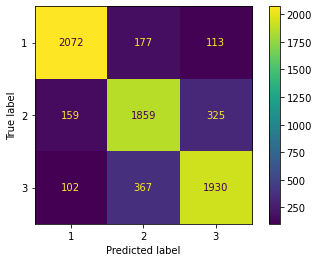

In [10]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
NUM_CLASSES = 3

train_loss = 0.0
class_correct = list(0. for i in range(NUM_CLASSES))
class_total = list(0. for i in range(NUM_CLASSES))
actual = []
predicted = []

model.eval()

for i, (x, y) in enumerate(train_loader):
	(x, y) = (x.to(device), y.to(torch.float32).to(device))
	output = model(x)
	loss = criterion(output, y)
	train_loss += loss.item() * x.size(0)
	_, pred = torch.max(output, 1)   
	_, y = torch.max(y, 1)
	actual.extend(y)
	predicted.extend(pred)
	correct_tensor = pred.eq(y)
	correct = np.squeeze(correct_tensor)
	for i in range(len(y.data)):
		label = y.data[i]
		class_correct[label] += correct[i].item() 
		class_total[label] += 1

train_loss = train_loss/len(train_loader.dataset)
print('Train Loss: {:.6f}\n'.format(train_loss))

for i in range(NUM_CLASSES):
    print('Train Accuracy of %5s: %2d%% (%2d/%2d)' % (
        i, 100.0 * class_correct[i] / class_total[i],
        np.sum(class_correct[i]), np.sum(class_total[i])))

print('\nTrain Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [1, 2, 3])

cm_display.plot()
plt.show()

# Accuracy = metrics.accuracy_score(actual, predicted)
# Precision = metrics.precision_score(actual, predicted)
# Sensitivity_recall = metrics.recall_score(actual, predicted)
# Specificity = metrics.recall_score(actual, predicted, pos_label=0)
# F1_score = metrics.f1_score(actual, predicted)

# #metrics:
# print({"Accuracy":Accuracy,"Precision":Precision,"Sensitivity_recall":Sensitivity_recall,"Specificity":Specificity,"F1_score":F1_score})


Test Loss: 0.823804

Test Accuracy of     0: 83% (495/595)
Test Accuracy of     1: 63% (386/612)
Test Accuracy of     2: 67% (371/553)

Test Accuracy (Overall): 71% (1252/1760)


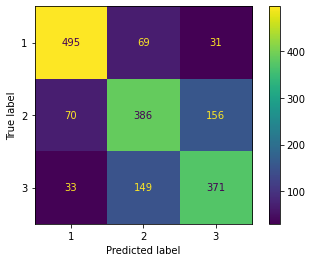

In [11]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

test_loss = 0.0
class_correct = list(0. for i in range(NUM_CLASSES))
class_total = list(0. for i in range(NUM_CLASSES))
actual = []
predicted = []
model.eval()

for i, (x, y) in enumerate(test_loader):
	(x, y) = (x.to(device), y.to(torch.float32).to(device))
	output = model(x)
	loss = criterion(output, y)
	test_loss += loss.item() * x.size(0)
	_, pred = torch.max(output, 1)   
	_, y = torch.max(y, 1)
	actual.extend(y)
	predicted.extend(pred)
	correct_tensor = pred.eq(y)
	correct = np.squeeze(correct_tensor)
	for i in range(len(y.data)):
		label = y.data[i]
		class_correct[label] += correct[i].item() 
		class_total[label] += 1

test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(NUM_CLASSES):
    print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            i, 100.0 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))
confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [1, 2, 3])

cm_display.plot()
plt.show()

# Accuracy = metrics.accuracy_score(actual, predicted)
# Precision = metrics.precision_score(actual, predicted)
# Sensitivity_recall = metrics.recall_score(actual, predicted)
# Specificity = metrics.recall_score(actual, predicted, pos_label=0)
# F1_score = metrics.f1_score(actual, predicted)

# #metrics:
# print({"Accuracy":Accuracy,"Precision":Precision,"Sensitivity_recall":Sensitivity_recall,"Specificity":Specificity,"F1_score":F1_score})


In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import random
import pandas as pd
import numpy as np

class MLPCWithDropout(nn.Module):
    def __init__(self, input_size):
        super(MLPCWithDropout, self).__init__()
        self.l1 = nn.Linear(input_size, 100)
        self.l2 = nn.Linear(100, 300)
        self.l3 = nn.Linear(300, 100)
        self.dropout3 = nn.Dropout(0.3)
        self.l5 = nn.Linear(100, 3)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.l1(x)
        x = F.relu(x)
        x = self.l2(x)
        x = F.relu(x)
        x = self.l3(x)
        x = F.relu(x)
        x = self.dropout3(x)
        output = self.l5(x)
        output = self.softmax(output)
        return output

num_cols = 7
model = MLPCWithDropout(num_cols)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

file_path = './voice_MLPC_online_and_recording_data_model.pth'

checkpoint = torch.load(file_path)
model.load_state_dict(checkpoint['state_dict'])
optimizer.load_state_dict(checkpoint['optimizer'])
model.eval()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

MLPCWithDropout(
  (l1): Linear(in_features=7, out_features=100, bias=True)
  (l2): Linear(in_features=100, out_features=300, bias=True)
  (l3): Linear(in_features=300, out_features=100, bias=True)
  (dropout3): Dropout(p=0.3, inplace=False)
  (l5): Linear(in_features=100, out_features=3, bias=True)
  (softmax): Softmax(dim=1)
)